In [1]:
import pandas as pd

df = pd.read_csv('mega-sena.csv')

In [2]:
df

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
0,2334,13/01/2021,22,4,20,25,13,60
1,2333,09/01/2021,41,53,55,9,16,31
2,2332,06/01/2021,12,33,44,52,35,36
3,2331,02/01/2021,53,16,11,57,13,36
4,2330,31/12/2020,22,35,17,41,20,42
...,...,...,...,...,...,...,...,...
2329,5,08/04/1996,1,19,46,6,16,2
2330,4,01/04/1996,6,59,42,27,1,5
2331,3,25/03/1996,36,30,10,11,29,47
2332,2,18/03/1996,9,39,37,49,43,41


In [3]:
from itertools import combinations

n = df.shape[0]

df['min_diff'] = 100

for i in range(0,n):

    comb = list(combinations(df.iloc[i, 2:8],2))

    for a, b in comb:
        diff = abs(a - b)

        if df.loc[i, 'min_diff'] > diff:
            df.loc[i, 'min_diff'] = diff

In [4]:
df

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,min_diff
0,2334,13/01/2021,22,4,20,25,13,60,2
1,2333,09/01/2021,41,53,55,9,16,31,2
2,2332,06/01/2021,12,33,44,52,35,36,1
3,2331,02/01/2021,53,16,11,57,13,36,2
4,2330,31/12/2020,22,35,17,41,20,42,1
...,...,...,...,...,...,...,...,...,...
2329,5,08/04/1996,1,19,46,6,16,2,1
2330,4,01/04/1996,6,59,42,27,1,5,1
2331,3,25/03/1996,36,30,10,11,29,47,1
2332,2,18/03/1996,9,39,37,49,43,41,2


<AxesSubplot:xlabel='min_diff', ylabel='Probability'>

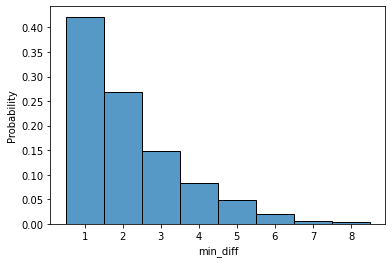

In [5]:
import seaborn as sns

sns.histplot(df, x="min_diff", binwidth=1, stat="probability", discrete=True)

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=9.99283e-138, Tstat=662.159


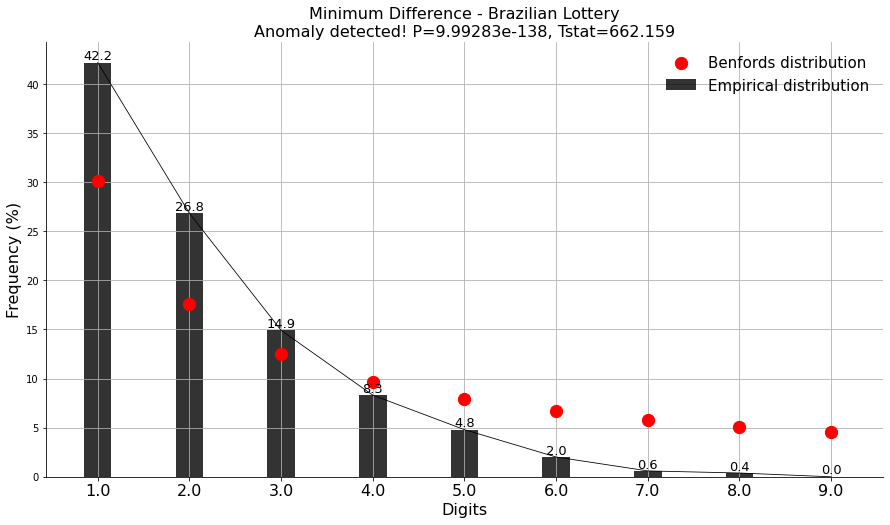

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Minimum Difference - Brazilian Lottery\nAnomaly detected! P=9.99283e-138, Tstat=662.159'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [6]:
from benfordslaw import benfordslaw

# Initialize
bl = benfordslaw(alpha=0.05)

# Extract information
X = df['min_diff']

# Make fit
results = bl.fit(X)

# Plot
bl.plot(title='Minimum Difference - Brazilian Lottery')